Desafio 18: Análise de Avaliação de Cursos Online

📂 Dataset: Avaliações de cursos online em diferentes áreas, com dados sobre avaliação, carga horária e número de alunos.
Colunas: Curso, Categoria, Avaliação, Carga_Horaria_h, Total_Alunos

🎯 Atividades:

Qual é a média geral de avaliação dos cursos?

Quais cursos têm avaliação acima de 4.5 e mais de 500 alunos?

Qual é a categoria com maior média de avaliação?

Existe alguma relação entre carga horária e avaliação média dos cursos?

Crie um gráfico de dispersão entre Carga_Horaria_h e Avaliação, diferenciando os pontos pela Categoria.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
#Testando dataset
df = pd.read_csv("dia_18_avaliacao_cursos.csv")
df.head()

,Curso,Categoria,Avaliação,Carga_Horaria_h,Total_Alunos
0,Python para Iniciantes,Dados,1.2,1,406
1,SQL e Banco de Dados,Tecnologia,4.2,1,978
2,Análise de Dados com Pandas,Tecnologia,4.0,9,972
3,Python para Iniciantes,Negócios,1.2,35,859
4,Power BI Essencial,Dados,2.2,23,365


In [24]:
#Qual é a média geral de avaliação dos cursos?
mediaAvaliacaoCurso = df["Avaliação"].mean()
print(f"A média geral de avaliação dos cursos é: {mediaAvaliacaoCurso:.2f}")

A média geral de avaliação dos cursos é: 3.06


In [32]:
#Quais cursos têm avaliação acima de 4.5 e mais de 500 alunos?
cursosFiltrados = df[(df["Avaliação"] > 4.5) & (df["Total_Alunos"] > 500)]
print(f"Cursos com avaliação acima de 4.5 e mais de 500 alunos: \n\n{cursosFiltrados["Curso"].drop_duplicates().to_string()}")

Cursos com avaliação acima de 4.5 e mais de 500 alunos: 

31         Machine Learning Básico
50          Python para Iniciantes
65            SQL e Banco de Dados
69     Análise de Dados com Pandas
102             Power BI Essencial


In [29]:
#Qual é a categoria com maior média de avaliação?
categoriaAvaliacao = df.groupby("Categoria")["Avaliação"].mean().sort_values(ascending=False)
print(f"{categoriaAvaliacao.idxmax()} é a categoria com maior média de avaliação")

Design é a categoria com maior média de avaliação


In [36]:
#Existe alguma relação entre carga horária e avaliação média dos cursos?
agrupadoMedias = df.groupby("Curso").agg({"Avaliação": "mean", "Carga_Horaria_h": "mean"}).reset_index()

correlacao = agrupadoMedias["Avaliação"].corr(agrupadoMedias["Carga_Horaria_h"])
print(f"Correlação entre carga horária e avaliação: {correlacao:.2f}")

Correlação entre carga horária e avaliação: 0.67


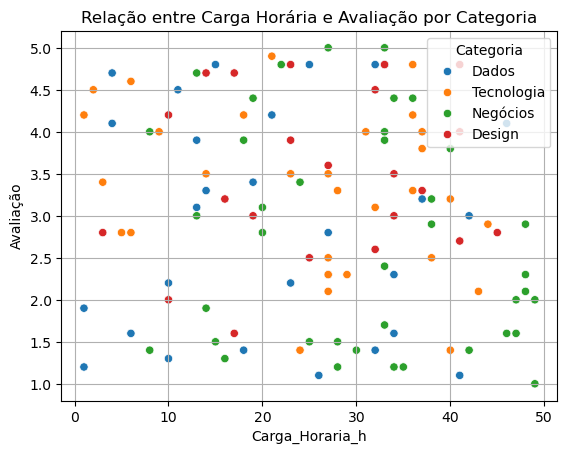

In [43]:
#Crie um gráfico de dispersão entre Carga_Horaria_h e Avaliação, diferenciando os pontos pela Categoria.
sns.scatterplot(data=df, x='Carga_Horaria_h', y='Avaliação', hue='Categoria')
plt.title('Relação entre Carga Horária e Avaliação por Categoria')
plt.grid(True)
plt.legend(title='Categoria')
plt.show()